### Find out the confirmed cases Doubling Rate for US States to find out which state was able to control the spread and then look into the containment measures that state took vs California.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',300)
sns.set(style="darkgrid")

In [3]:
dfconfirmed = pd.read_csv('C:/Users/ysman/Documents/yuga/udemy/dfconfirmed.csv',sep=',')
dfconfirmed.head()

,Date,State,County,Confirmed
0,2020-01-22,Alabama,Autauga,0
1,2020-01-22,Alabama,Baldwin,0
2,2020-01-22,Alabama,Barbour,0
3,2020-01-22,Alabama,Bibb,0
4,2020-01-22,Alabama,Blount,0


In [4]:
dfplot = pd.read_csv('C:/Users/ysman/Documents/yuga/udemy/COVID_table.csv',sep=',')
dfplot.head()

,date,California,Texas,New York,Oregon,New Jersy
0,2020-01-22,0,0,0,0,0
1,2020-01-23,0,0,0,0,0
2,2020-01-24,0,0,0,0,0
3,2020-01-25,0,0,0,0,0
4,2020-01-26,2,0,0,0,0


C:\Users\ysman\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1152x648 with 0 Axes>

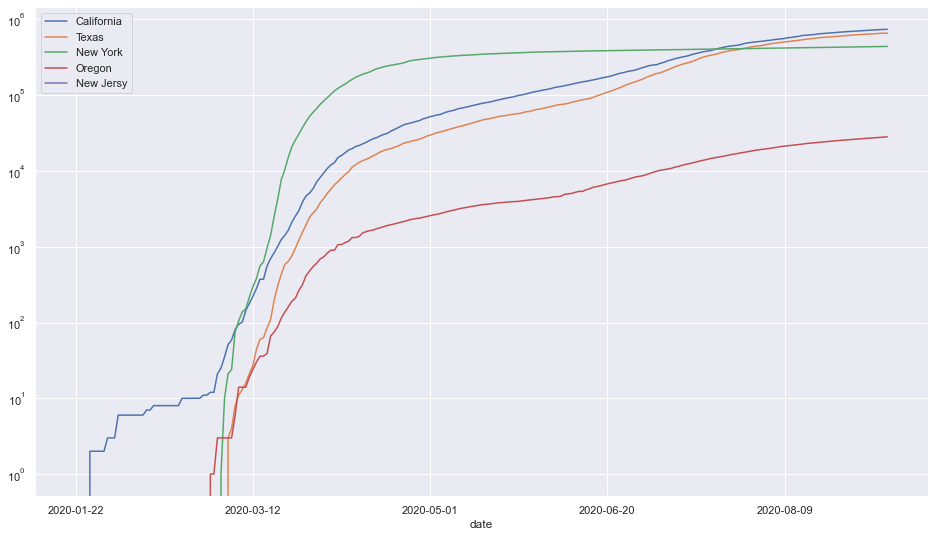

In [5]:
plt.figure();
ax=dfplot.set_index('date').plot()
ax.set_yscale('log')

In [6]:
import plotly.graph_objects as go

In [7]:
import plotly
plotly.__version__

'4.9.0'

In [8]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [9]:
state_list = ['California', 'Texas', 'New York', 'Oregon', 'New Jersy']

In [10]:
fig = go.Figure()

for each in state_list:
    fig.add_trace(go.Scatter(x=dfplot.date.iloc[90:],
                            y=dfplot[each], 
                            mode='markers+lines',
                            opacity=0.9,
                            line_width=2,
                            marker_size=4,
                            name=each))

fig.update_layout(
    width=1200,
    height=800,
    xaxis_title='Date',
    yaxis_title="Confirmed cases for california - log scale")

fig.update_yaxes(type='log', range=[1.1,5.1])
fig.show()

import dash
import dash_core_components as dcc
import dash_html_components as html

app =  dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select State'),
    dcc.Dropdown(id='state_drop_down',
    options=[
        {'label': 'California', 'value': 'California'},
        {'label': 'Texas', 'value': 'Texas'},
        {'label': 'New York', 'value': 'New York'},
        {'label': 'Oregon', 'value': 'Oregon'},
        {'label': 'New Jersy', 'value': 'New Jersy'}],
    value=['California', 'New York'],
    multi=True),
    dcc.Graph(figure=fig, id='main_window_spope')
])


In [11]:
dfplot.sort_values('date', ascending=True).tail()

,date,California,Texas,New York,Oregon,New Jersy
225,2020-09-03,726018,645422,437107,27336,0
226,2020-09-04,730662,651350,437971,27601,0
227,2020-09-05,735314,655815,438772,27856,0
228,2020-09-06,738856,658202,439501,28044,0
229,2020-09-07,740965,659041,440021,28190,0


In [12]:
def quick_plot(x_in, df_input, y_scale='log', slider=False):

    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name=each,
                        opacity=0.8))
    
    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [13]:
quick_plot(dfplot.date,
           dfplot.iloc[:,1:],
           y_scale='linear',
           slider=True)

In [14]:
threshold=100

In [15]:
compare_list=[]
for pos,State in enumerate(dfplot.columns[1:]):
    compare_list.append(np.array(dfplot[State][dfplot[State]>threshold]))
    
compare_list

[array([   101,    144,    178,    221,    281,    372,    373,    557,
           700,    831,   1009,   1243,   1412,   1651,   2113,   2542,
          3009,   3910,   4679,   5110,   5863,   7155,   8233,   9410,
         10790,  12016,  12837,  15034,  16024,  17351,  18897,  19710,
         21081,  21717,  22800,  23934,  25389,  26686,  27677,  29157,
         30511,  31431,  33686,  35480,  37352,  39561,  41355,  42368,
         43559,  44972,  46164,  48747,  50130,  52026,  53347,  54903,
         55884,  58456,  60616,  62148,  63800,  66572,  67600,  69329,
         70980,  72798,  74871,  76693,  78725,  80166,  81518,  83764,
         86018,  88056,  90281,  92564,  94069,  96470,  99492, 101071,
        103813, 106638, 109895, 111951, 114733, 117215, 119374, 122194,
        125783, 128606, 130657, 133816, 136681, 139715, 143439, 146659,
        150034, 152349, 155726, 158961, 162798, 167133, 170862, 175243,
        178657, 184765, 191477, 196024, 201112, 206844, 210692, 

In [16]:
Newdf = pd.DataFrame(compare_list, index=dfplot.columns[1:]).T

In [17]:
Newdf['date']=np.arange(Newdf.shape[0])

In [18]:
Newdf.head()

,California,Texas,New York,Oregon,New Jersy,date
0,101.0,110.0,105.0,114.0,NaN,0
1,144.0,196.0,138.0,137.0,NaN,1
2,178.0,306.0,152.0,161.0,NaN,2
3,221.0,429.0,216.0,191.0,NaN,3
4,281.0,582.0,296.0,210.0,NaN,4


In [19]:
quick_plot(dfplot.date,
           dfplot.iloc[:,:-1],
           y_scale='log',
           slider=True)

In [20]:
def doubling_rate(N_0,t,T_d):
    return N_0*np.power(2,t/T_d)

In [21]:
max_days=90

norm_slopes={
    #'doubling every day':doubling_rate(100,np.arange(10),1),
    'doubling every two days':doubling_rate(100,np.arange(20),2),
    'doubling every 4 days':doubling_rate(100,np.arange(20),4),
    'doubling every 10 days':doubling_rate(100,np.arange(20),10),
}

In [22]:
Newdf_w_slope=pd.concat([pd.DataFrame(norm_slopes),Newdf], axis=1)

In [23]:
Newdf_w_slope

,doubling every two days,doubling every 4 days,doubling every 10 days,California,Texas,New York,Oregon,New Jersy,date
0,100.000000,100.000000,100.000000,101.0,110.0,105.0,114.0,NaN,0
1,141.421356,118.920712,107.177346,144.0,196.0,138.0,137.0,NaN,1
2,200.000000,141.421356,114.869835,178.0,306.0,152.0,161.0,NaN,2
3,282.842712,168.179283,123.114441,221.0,429.0,216.0,191.0,NaN,3
4,400.000000,200.000000,131.950791,281.0,582.0,296.0,210.0,NaN,4
5,565.685425,237.841423,141.421356,372.0,643.0,379.0,266.0,NaN,5
6,800.000000,282.842712,151.571657,373.0,758.0,557.0,316.0,NaN,6
7,1131.370850,336.358566,162.450479,557.0,955.0,633.0,416.0,NaN,7
8,1600.000000,400.000000,174.110113,700.0,1229.0,961.0,479.0,NaN,8
9,2262.741700,475.682846,186.606598,831.0,1563.0,1407.0,548.0,NaN,9


In [24]:
quick_plot(Newdf_w_slope.date,
           Newdf_w_slope.iloc[:,0:7],
           y_scale='log',
           slider=True)

In [25]:
Newdf_w_slope.to_csv('C:/Users/ysman/Documents/yuga/udemy/slope.csv',sep=',',index=False)

# Linear Regression

In [26]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)